In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

### Initial checks
- missing values
- duplicates
- data types
- unique values in each column
- check stats
- check different categories in each column

In [4]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [5]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

no missing values

In [9]:
df.duplicated().sum()

np.int64(0)

no duplicate rows

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# EDA

In [11]:
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Observations
- means of all three subjects are close between 66 and 68.05
- std is close as well
- min score in maths is 0, writing has 10 and reading has 17 as expected

In [13]:
for col in df.columns:
    print(df[col].value_counts())
    print()

gender
female    518
male      482
Name: count, dtype: int64

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

math_score
65    36
62    35
69    32
59    32
73    27
      ..
24     1
26     1
19     1
23     1
8      1
Name: count, Length: 81, dtype: int64

reading_score
72    34
74    33
64    32
73    30
67    30
      ..
32     1
26     1
28     1
23     1
40     1
Name: count, Length: 72, dtype: int64

writing_score
74    35
70    33
68    31
73    28
62    27
      ..
19     1
35     1
15     1
30     1
23     1
Name: count, Length: 77, dtype: int64


In [14]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [19]:
# define cat and numerical features 
num_features = [col for col in df.columns if df[col].dtype != 'O']
cat_features = [col for col in df.columns if df[col].dtype == 'O']
num_features

['math_score', 'reading_score', 'writing_score']

Total Score and Avg Score

In [20]:
df['total'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = df['total']/3
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  total  \
0                    none          72             72             74    218   
1               completed          69             90             88    247   
2                    none          90             95             93    278   
3                    none          47             57             44    148   
4                    none          76             78             75    229   

   avg_score  
0  72.666667  
1  82.333333  
2  92.666667  
3  49.333333  
4  76.333333

In [ ]:
# students with full marks

math_full = df[df['math_score'] == 100].shape[0]
reading_full = df[df['reading_score'] == 100].shape[0]
writing_full = df[df['writing_score'] == 100].shape[0]

print(math_full, reading_full, writing_full)

7 17 14


In [33]:
# number of students with less than 20 marks 

math_below_20 = df[df['math_score'] <= 20].shape[0]
reading_below_20 = df[df['reading_score'] <= 20].shape[0]
writing_below_20 = df[df['writing_score'] <= 20].shape[0]

print(math_below_20, reading_below_20, writing_below_20)

4 1 3


Observation 

- students have performed well in reading and worst in maths

### Visualisations

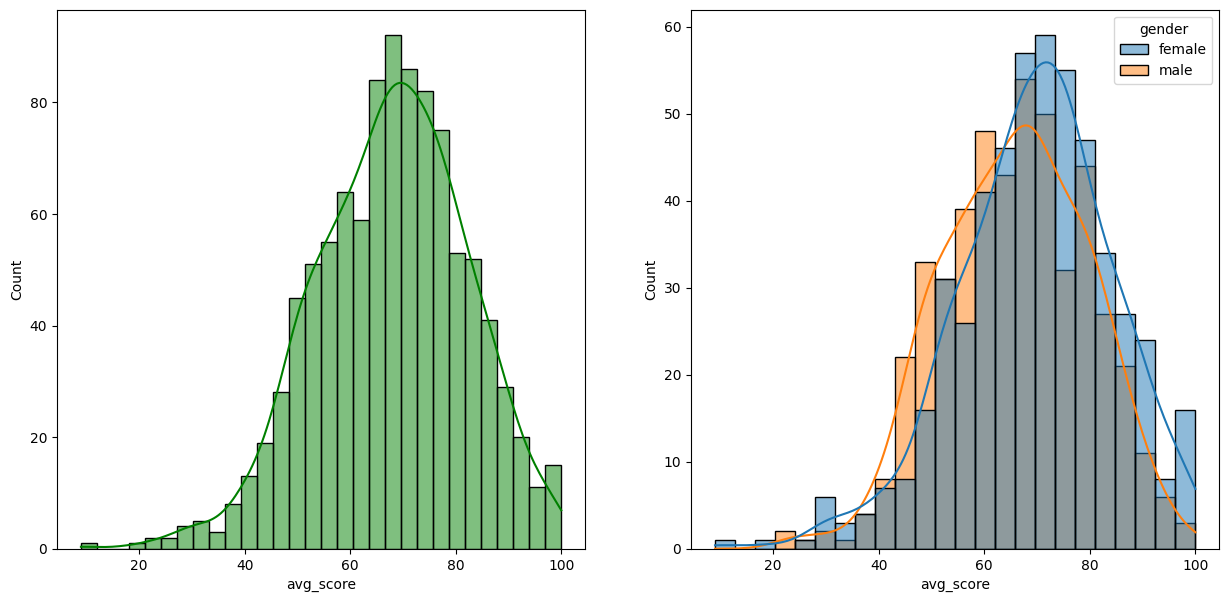

In [35]:
# avg score distribution using histogram and kde

fig, axs= plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x= 'avg_score', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'avg_score', hue='gender', kde = True)
plt.show()

Observation
- female students have scored higher

In [36]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  total  \
0                    none          72             72             74    218   
1               completed          69             90             88    247   
2                    none          90             95             93    278   
3                    none          47             57             44    148   
4                    none          76             78             75    229   

   avg_score  
0  72.666667  
1  82.333333  
2  92.666667  
3  49.333333  
4  76.333333

### comparing avg_score with lunch

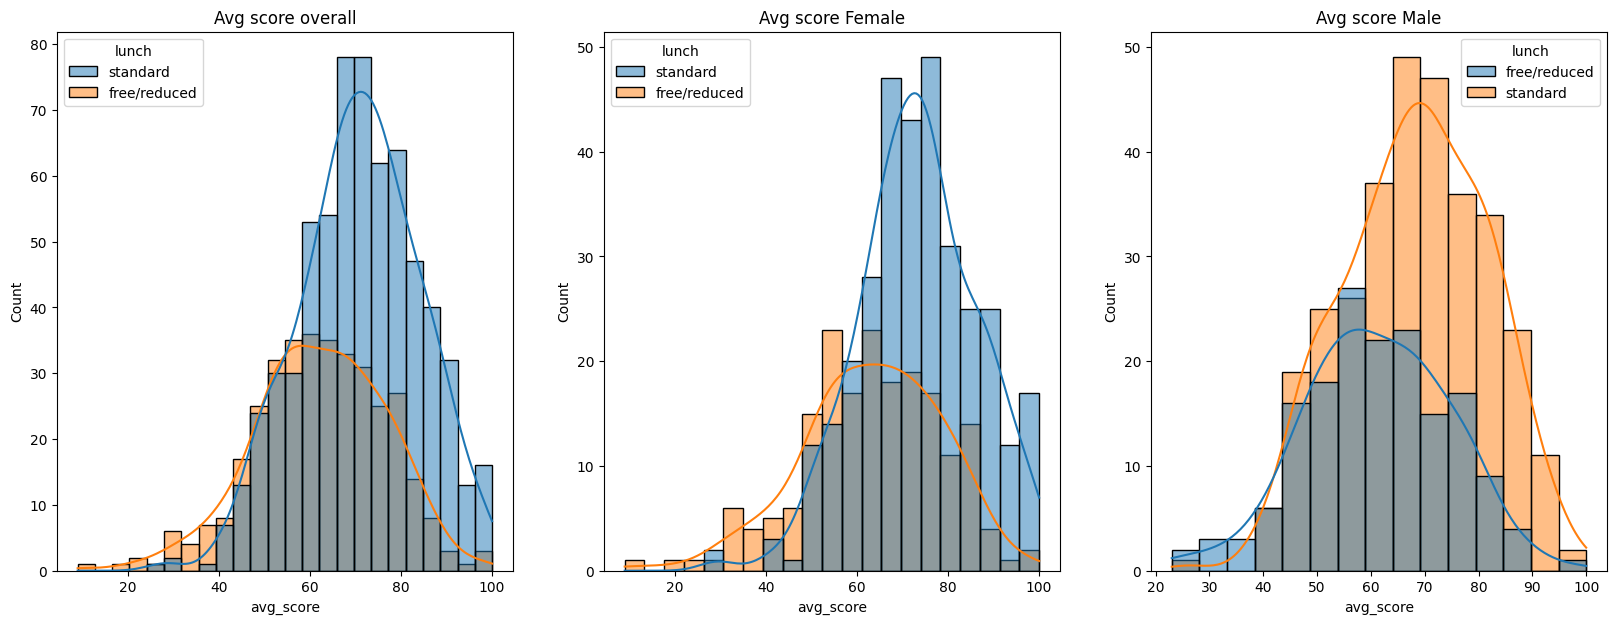

In [48]:
fig, axs= plt.subplots(1,3, figsize = (20,7))

plt.subplot(131)
sns.histplot(data = df, x = 'avg_score', kde = True, hue = 'lunch')
plt.title('Avg score overall')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'], x = 'avg_score', kde= True, hue= 'lunch')
plt.title('Avg score Female')
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'], x = 'avg_score', kde= True, hue= 'lunch')
plt.title('Avg score Male')
plt.show()

Observation
- standard lunch imporves the socres in both males and female

### comparing avg_scores with parental_level_of_education

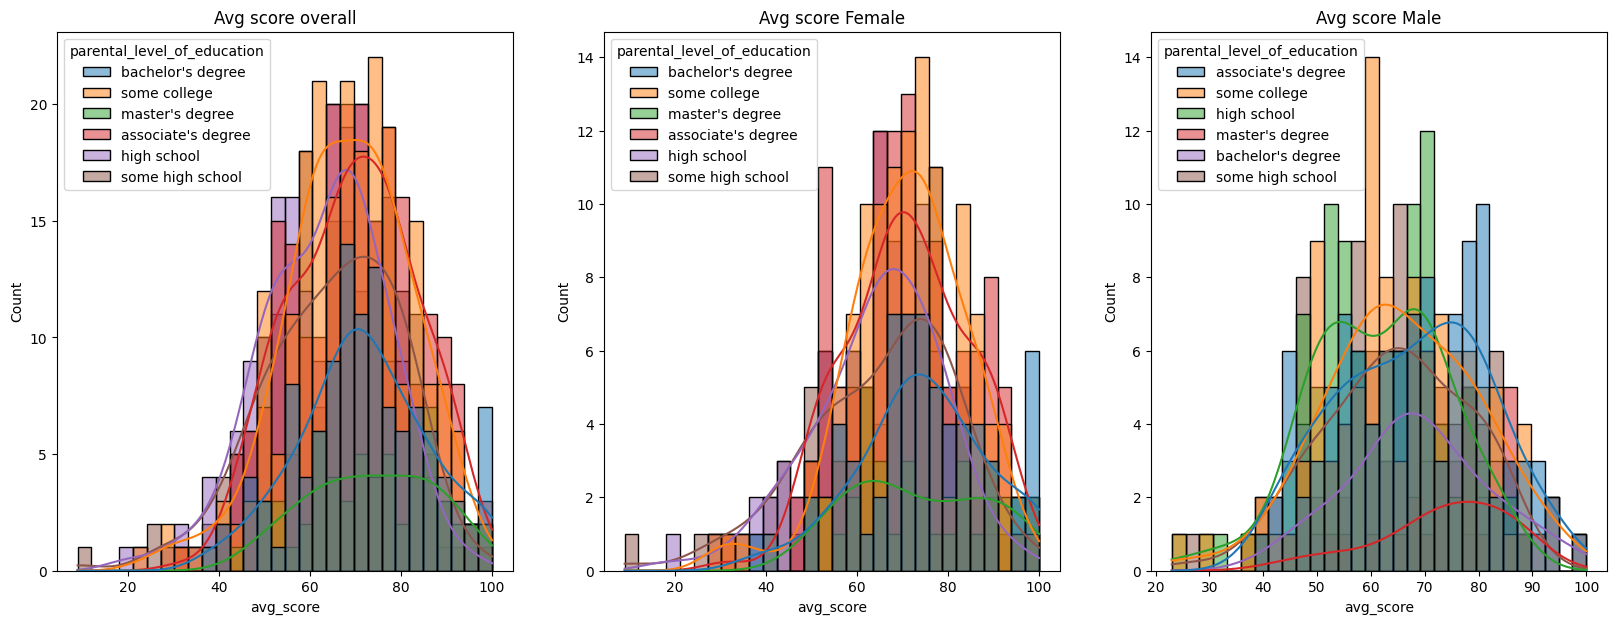

In [51]:
fig, axs= plt.subplots(1,3, figsize = (20,7))

plt.subplot(131)
sns.histplot(data = df, x = 'avg_score', kde = True, bins = 30, hue = 'parental_level_of_education')
plt.title('Avg score overall')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'], x = 'avg_score', kde= True, bins= 30, hue= 'parental_level_of_education')
plt.title('Avg score Female')
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'], x = 'avg_score', bins = 30, kde= True, hue= 'parental_level_of_education')
plt.title('Avg score Male')
plt.show()

Observation
- parents education doesn't make much difference 
- parents with masters degree or associate degree have higher score in male students
- not much effect on female students

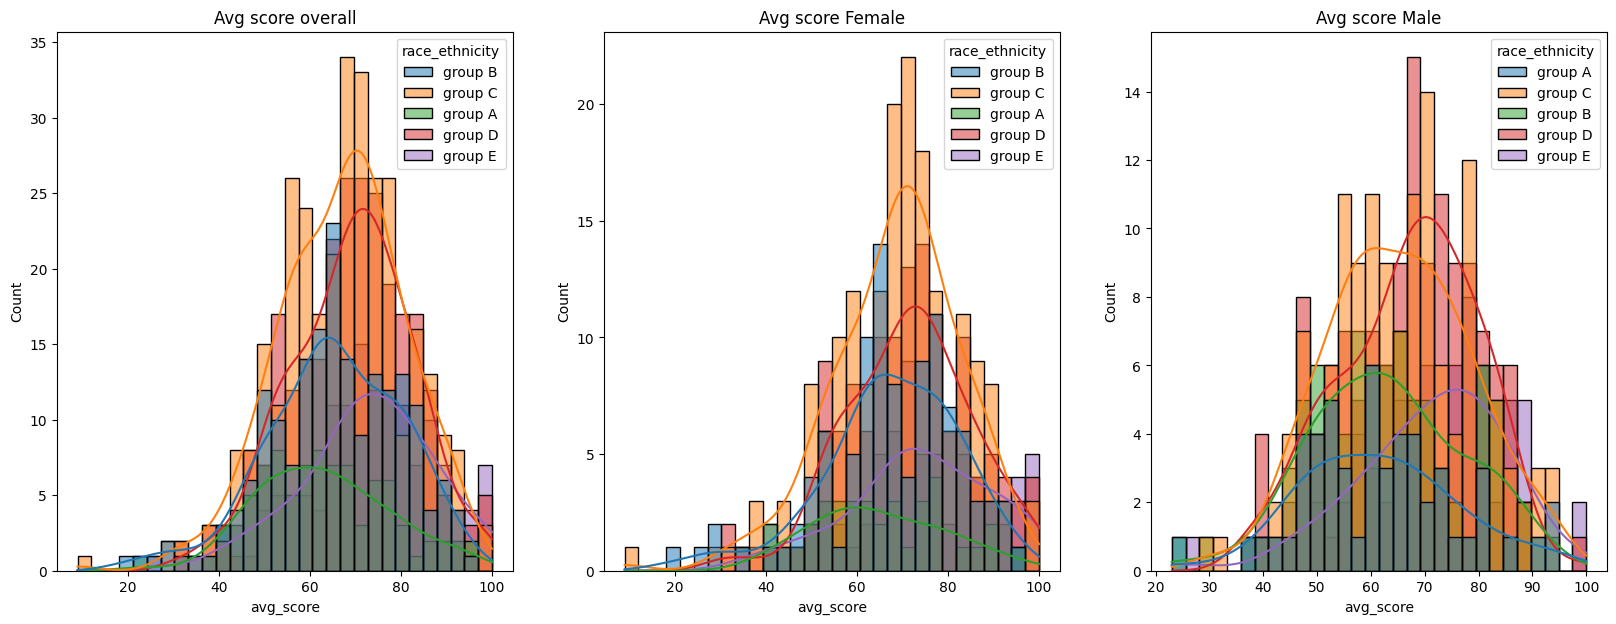

In [52]:
fig, axs= plt.subplots(1,3, figsize = (20,7))

plt.subplot(131)
sns.histplot(data = df, x = 'avg_score', kde = True, bins = 30, hue = 'race_ethnicity')
plt.title('Avg score overall')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'], x = 'avg_score', kde= True, bins= 30, hue= 'race_ethnicity')
plt.title('Avg score Female')
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'], x = 'avg_score', bins = 30, kde= True, hue= 'race_ethnicity')
plt.title('Avg score Male')
plt.show()

Observation
- group B and A perform poorly

<function matplotlib.pyplot.show(close=None, block=None)>

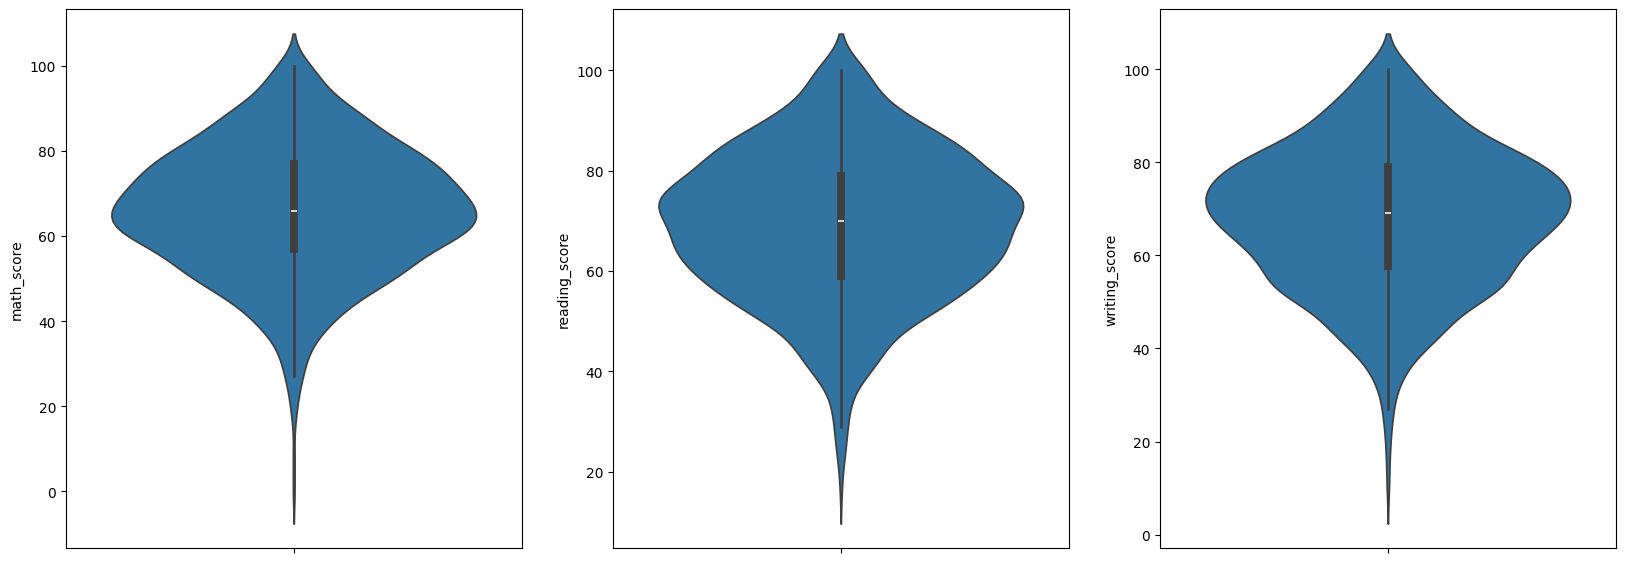

In [59]:
plt.figure(figsize=(20,7))
for i, col in enumerate(num_features):
    plt.subplot(1,3,i+1)
    sns.violinplot(y = df[col], data = df)
    
plt.show

### Multivariate analysis

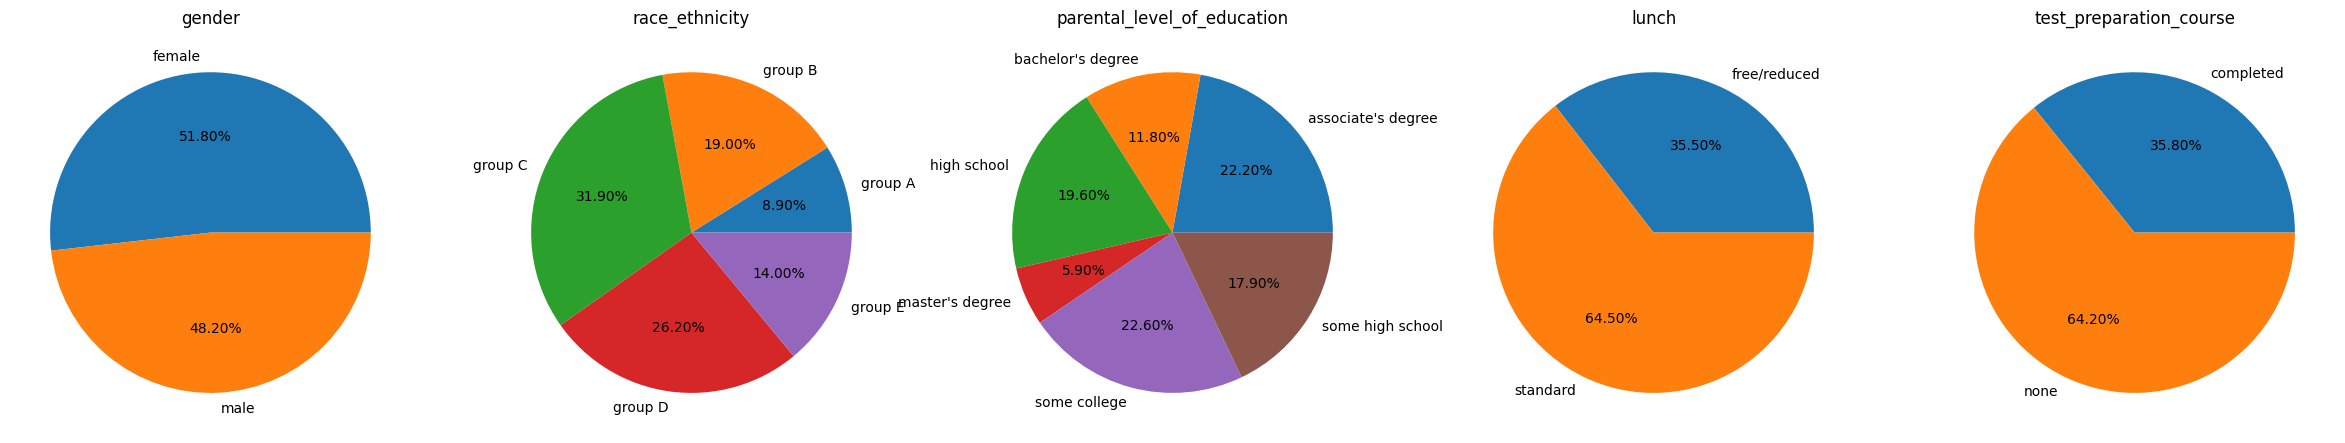

In [92]:
plt.rcParams['figure.figsize'] = (30, 12)   # set default size for all figures

for i, col in enumerate(cat_features):
    plt.subplot(1,5,i+1)
    temp = df[col].value_counts().sort_index()      #sorted index to match the sequence of labels 
    labels = sorted(df[col].unique().tolist())      # sorted the list to match the index of value count df
    plt.pie(temp, labels=labels, autopct='%.2f%%')
    plt.title(col)

plt.show()

Observations
- male female count is similar
- highest number of students from group C ethinicity
- highest number of students have their parents who have had aducation in 'some college' or associate degree
- standard lunch students are in majority
- most of the student have not enrolled in any test

### Column wise visualisation - Cat vs Numerical

In [104]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total', 'avg_score'],
      dtype='object')

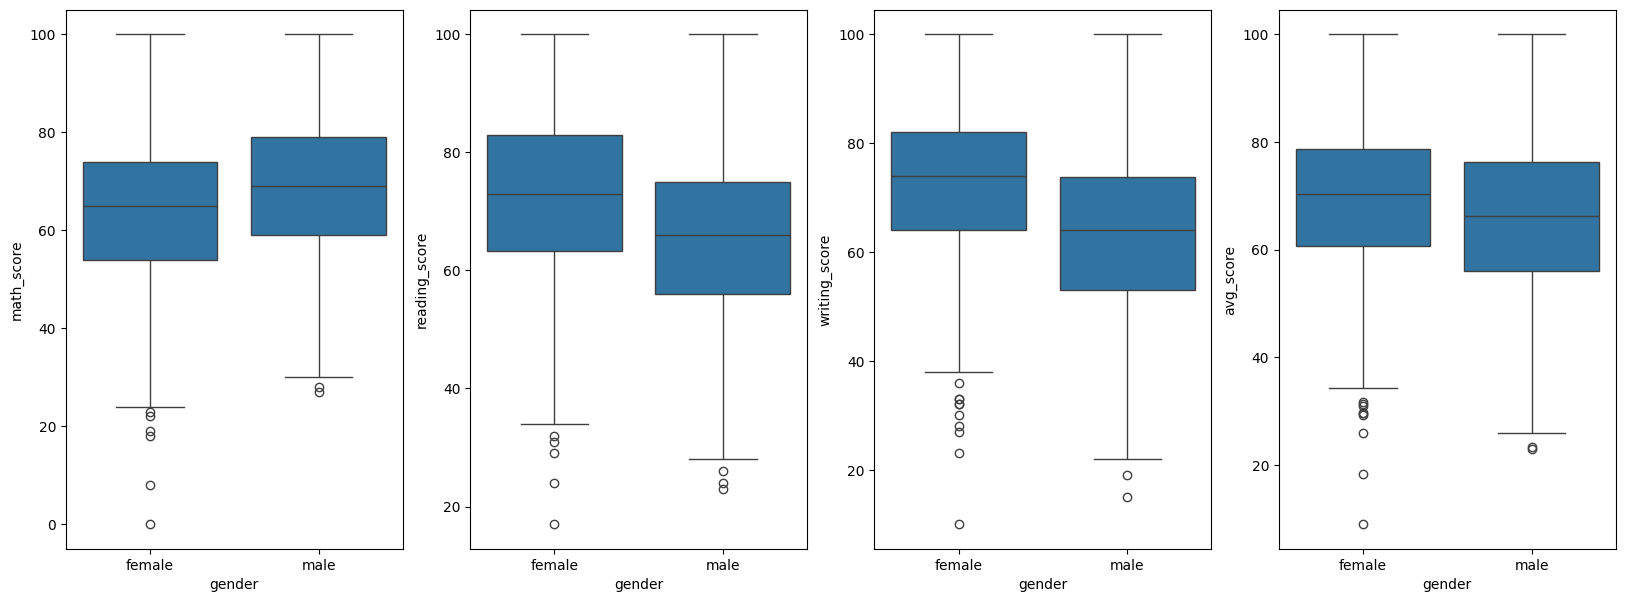

In [120]:
# gender
fig, ax = plt.subplots(1, 4, figsize= (20,7))

scores = ['math_score', 'reading_score', 'writing_score', 'avg_score']

for i, score in enumerate(scores):
    sns.boxplot(x= 'gender', y=score, data= df, ax = ax[i])

plt.show()

<Axes: xlabel='gender', ylabel='avg_score'>

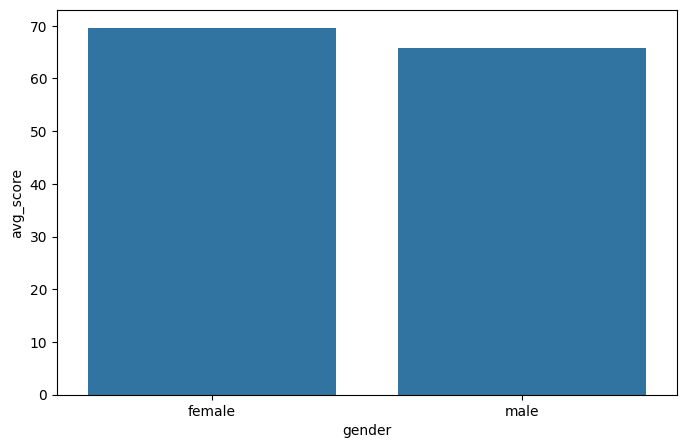

In [128]:
plt.figure(figsize=(8,5))
sns.barplot(df.groupby('gender')['avg_score'].mean())

Observations
- Females have higher avg score
- Females have scores higher except in maths

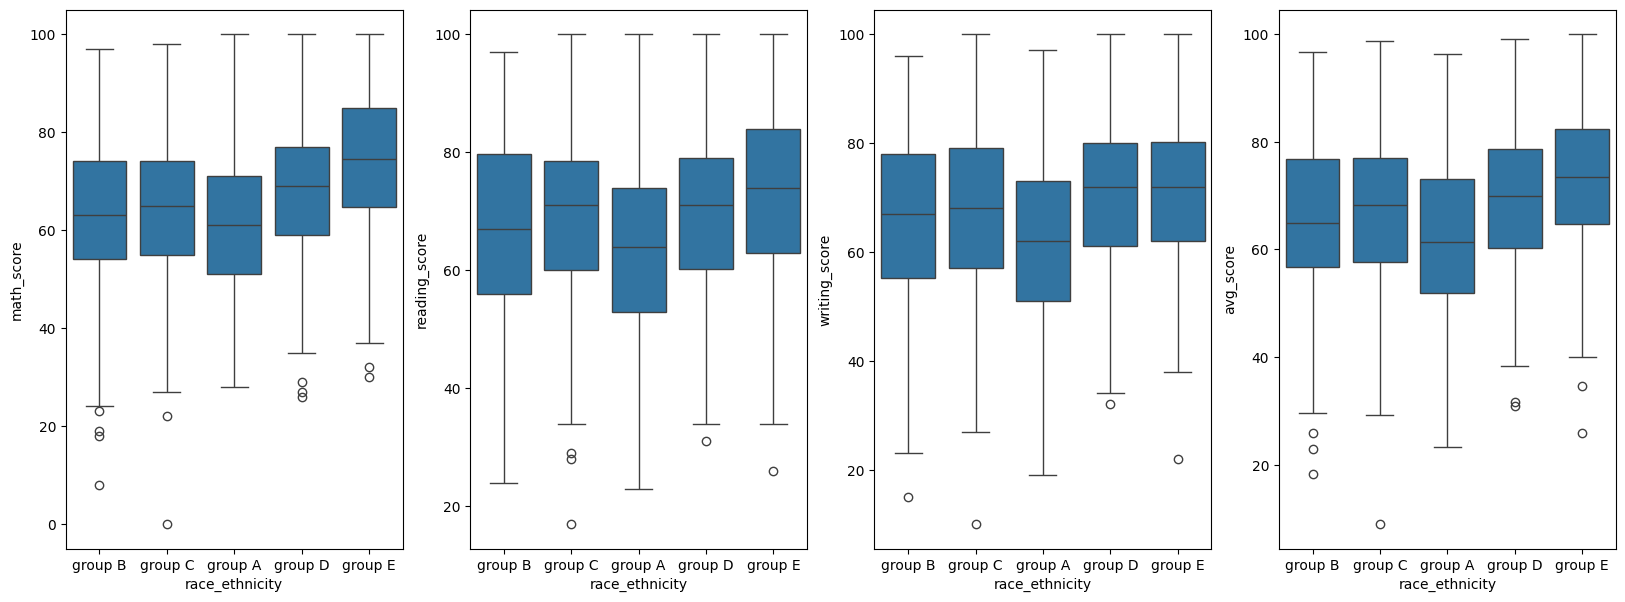

In [129]:
# race_ethnicity

fig, ax = plt.subplots(1, 4, figsize= (20,7))

scores = ['math_score', 'reading_score', 'writing_score', 'avg_score']

for i, score in enumerate(scores):
    sns.boxplot(x= 'race_ethnicity', y=score, data= df, ax = ax[i])

plt.show()

<Axes: xlabel='race_ethnicity', ylabel='avg_score'>

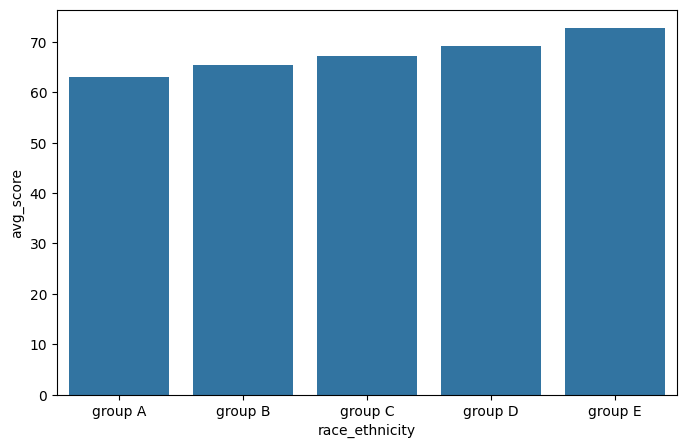

In [130]:
plt.figure(figsize=(8,5))
sns.barplot(df.groupby('race_ethnicity')['avg_score'].mean())

Observations
- Group A being the lowest scorers and Group E are the highest

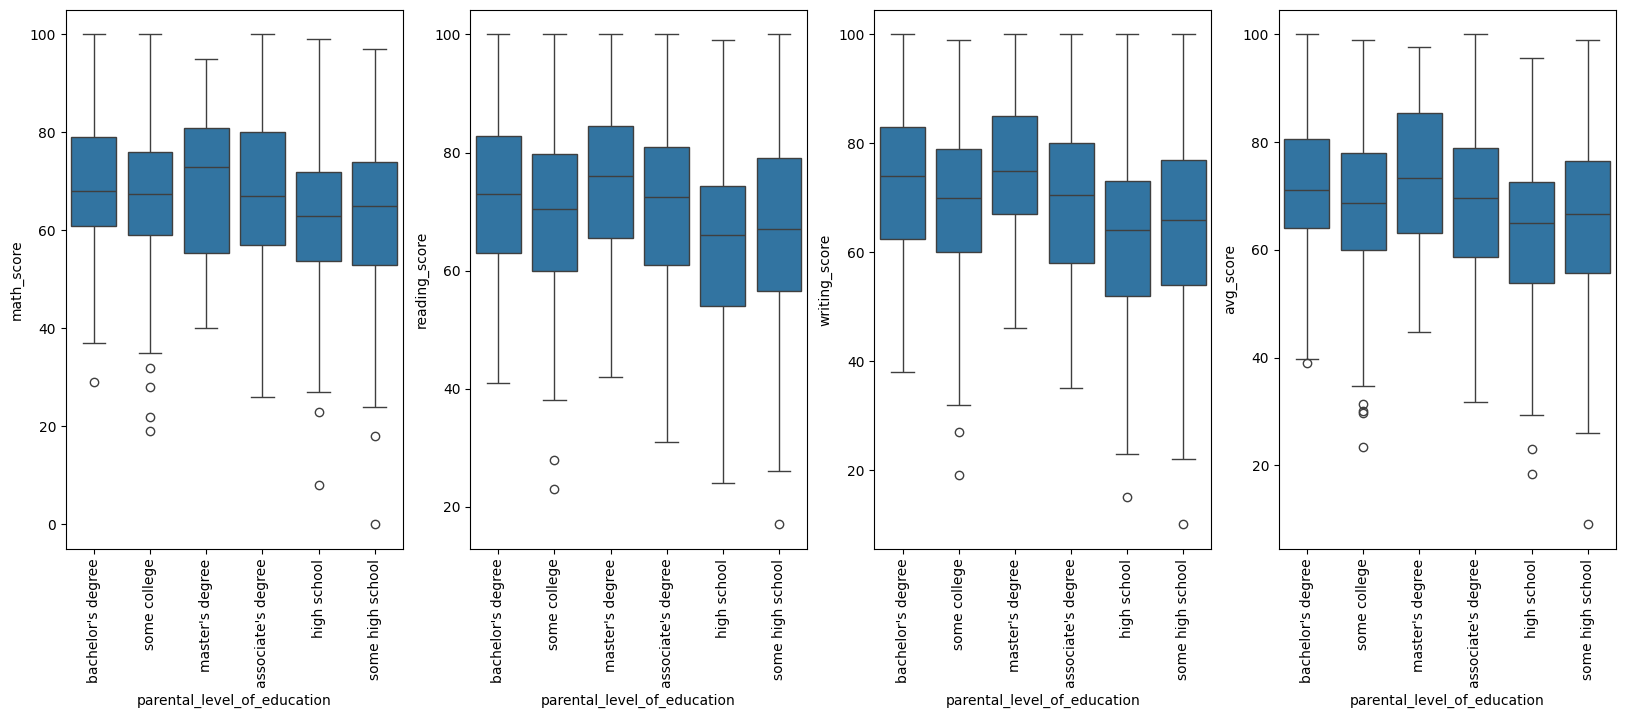

In [144]:
#parental_level_of_education

fig, ax = plt.subplots(1, 4, figsize= (20,7))

scores = ['math_score', 'reading_score', 'writing_score', 'avg_score']

for i, score in enumerate(scores):
    sns.boxplot(x= 'parental_level_of_education', y=score, data= df, ax = ax[i])
    ax[i].tick_params(axis = 'x', rotation = 90)

plt.show()

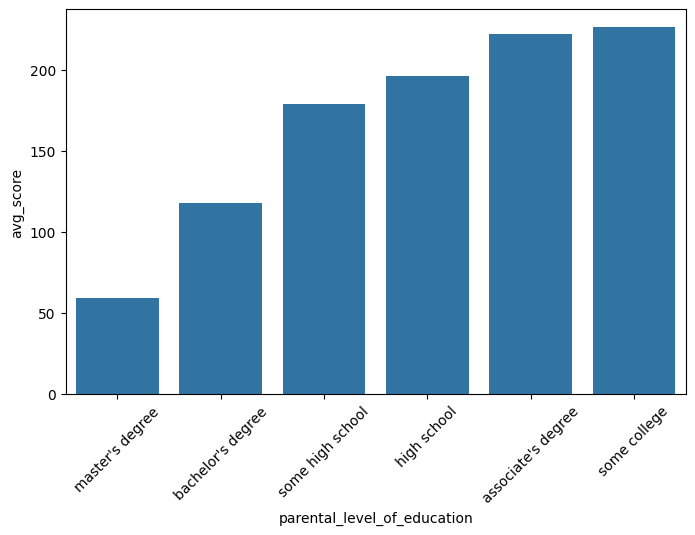

In [142]:
plt.figure(figsize=(8,5))
sns.barplot(df.groupby('parental_level_of_education')['avg_score'].count().sort_values())
plt.xticks(rotation = 45)
plt.show()

Observations
- some college have got the highest number of parents
- parents with master's degree have high scoring kids, highschool parents' kids have scored lower. 

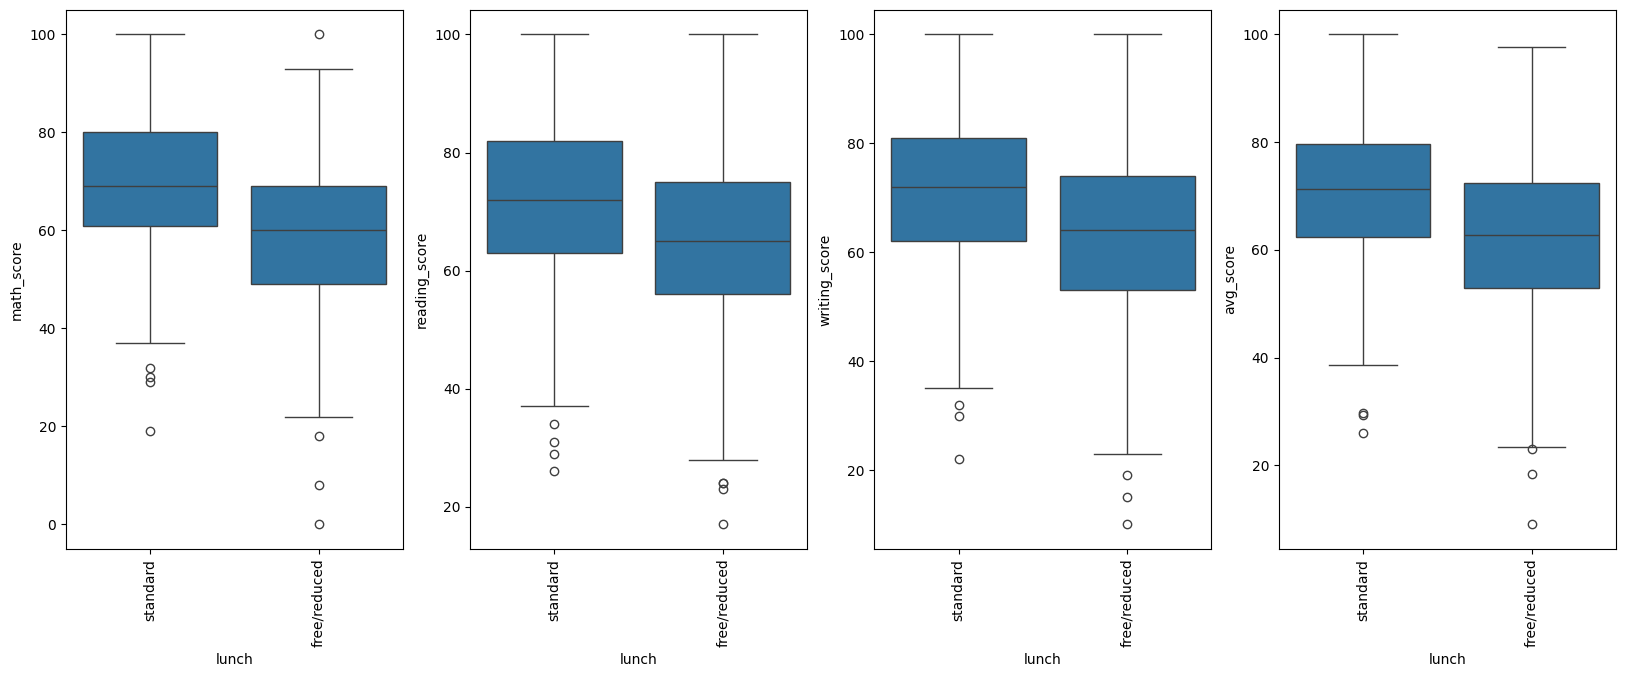

In [146]:
# lunch column

#parental_level_of_education

fig, ax = plt.subplots(1, 4, figsize= (20,7))

scores = ['math_score', 'reading_score', 'writing_score', 'avg_score']

for i, score in enumerate(scores):
    sns.boxplot(x= 'lunch', y=score, data= df, ax = ax[i])
    ax[i].tick_params(axis = 'x', rotation = 90)

plt.show()

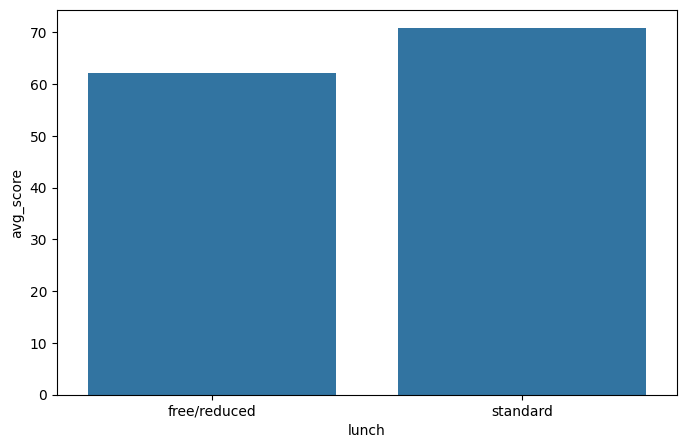

In [153]:
plt.figure(figsize=(8,5))
sns.barplot(df.groupby('lunch')['avg_score'].mean())
plt.show()

Observations
- students with standard lunch are more in numbers and have scored higher in all the subjects

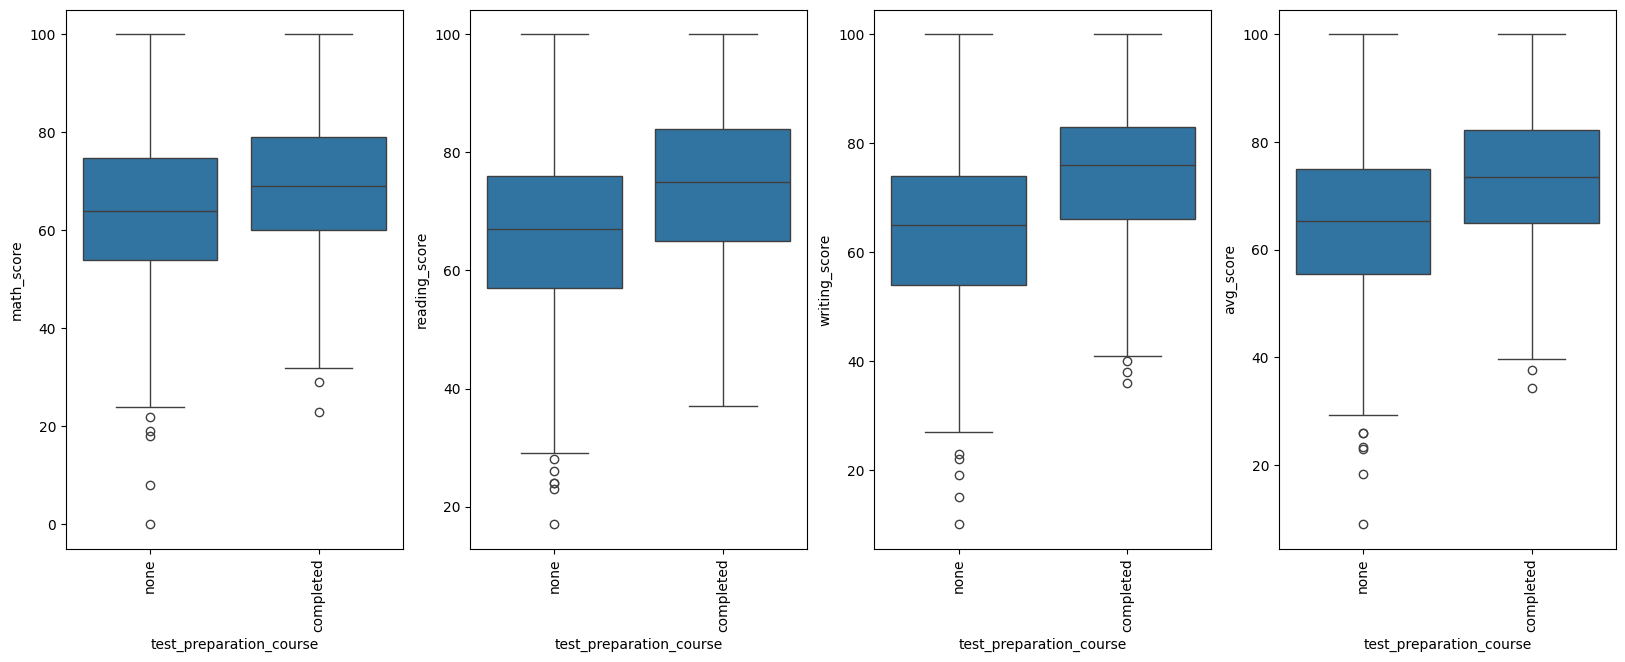

In [156]:
#test_preparation_course

fig, ax = plt.subplots(1, 4, figsize= (20,7))

scores = ['math_score', 'reading_score', 'writing_score', 'avg_score']

for i, score in enumerate(scores):
    sns.boxplot(x= 'test_preparation_course', y=score, data= df, ax = ax[i])
    ax[i].tick_params(axis = 'x', rotation = 90)

plt.show()

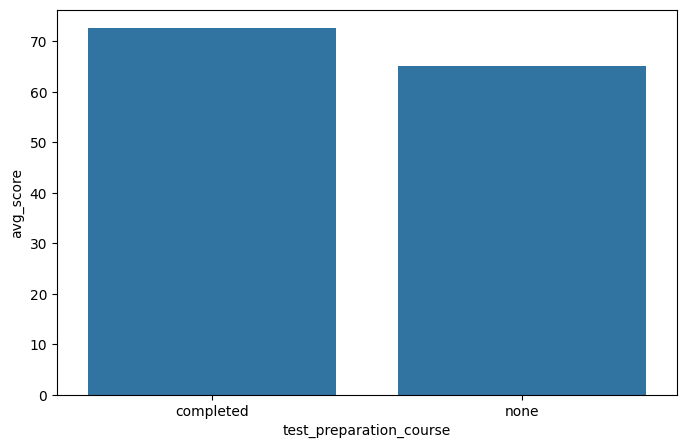

In [157]:
plt.figure(figsize=(8,5))
sns.barplot(df.groupby('test_preparation_course')['avg_score'].mean())
plt.show()

Observation 
- Students who have completed the course have scored higher in all the subjects

Multivariate analysis using pairplot

In [159]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total', 'avg_score'],
      dtype='object')

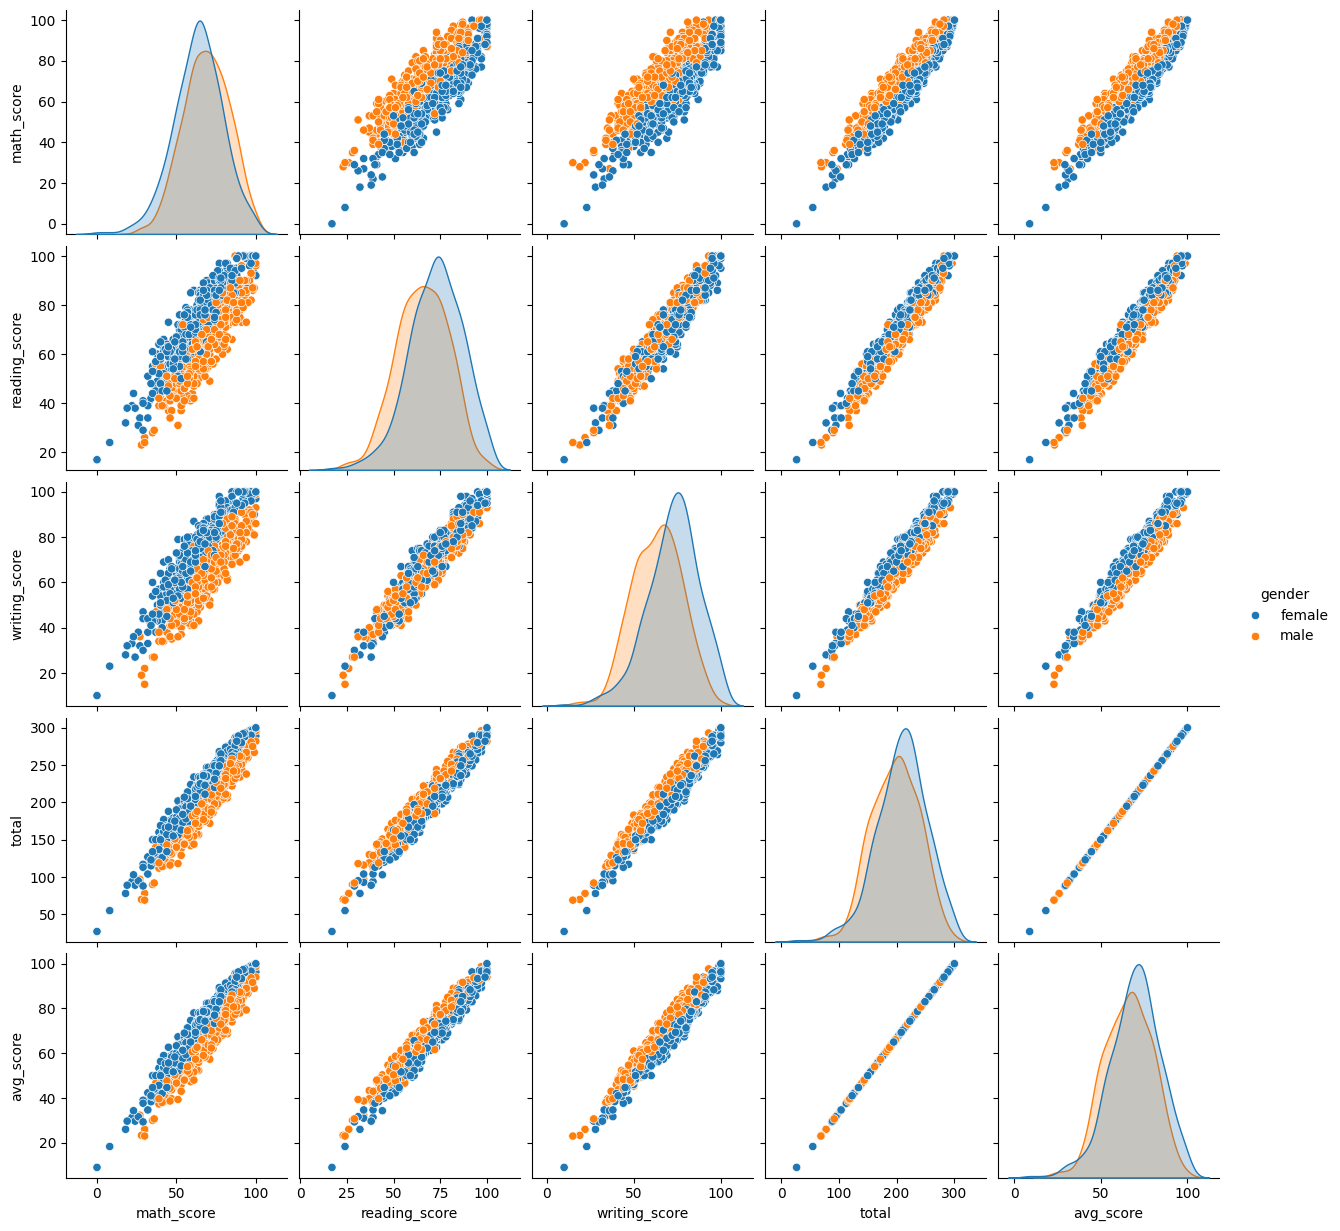

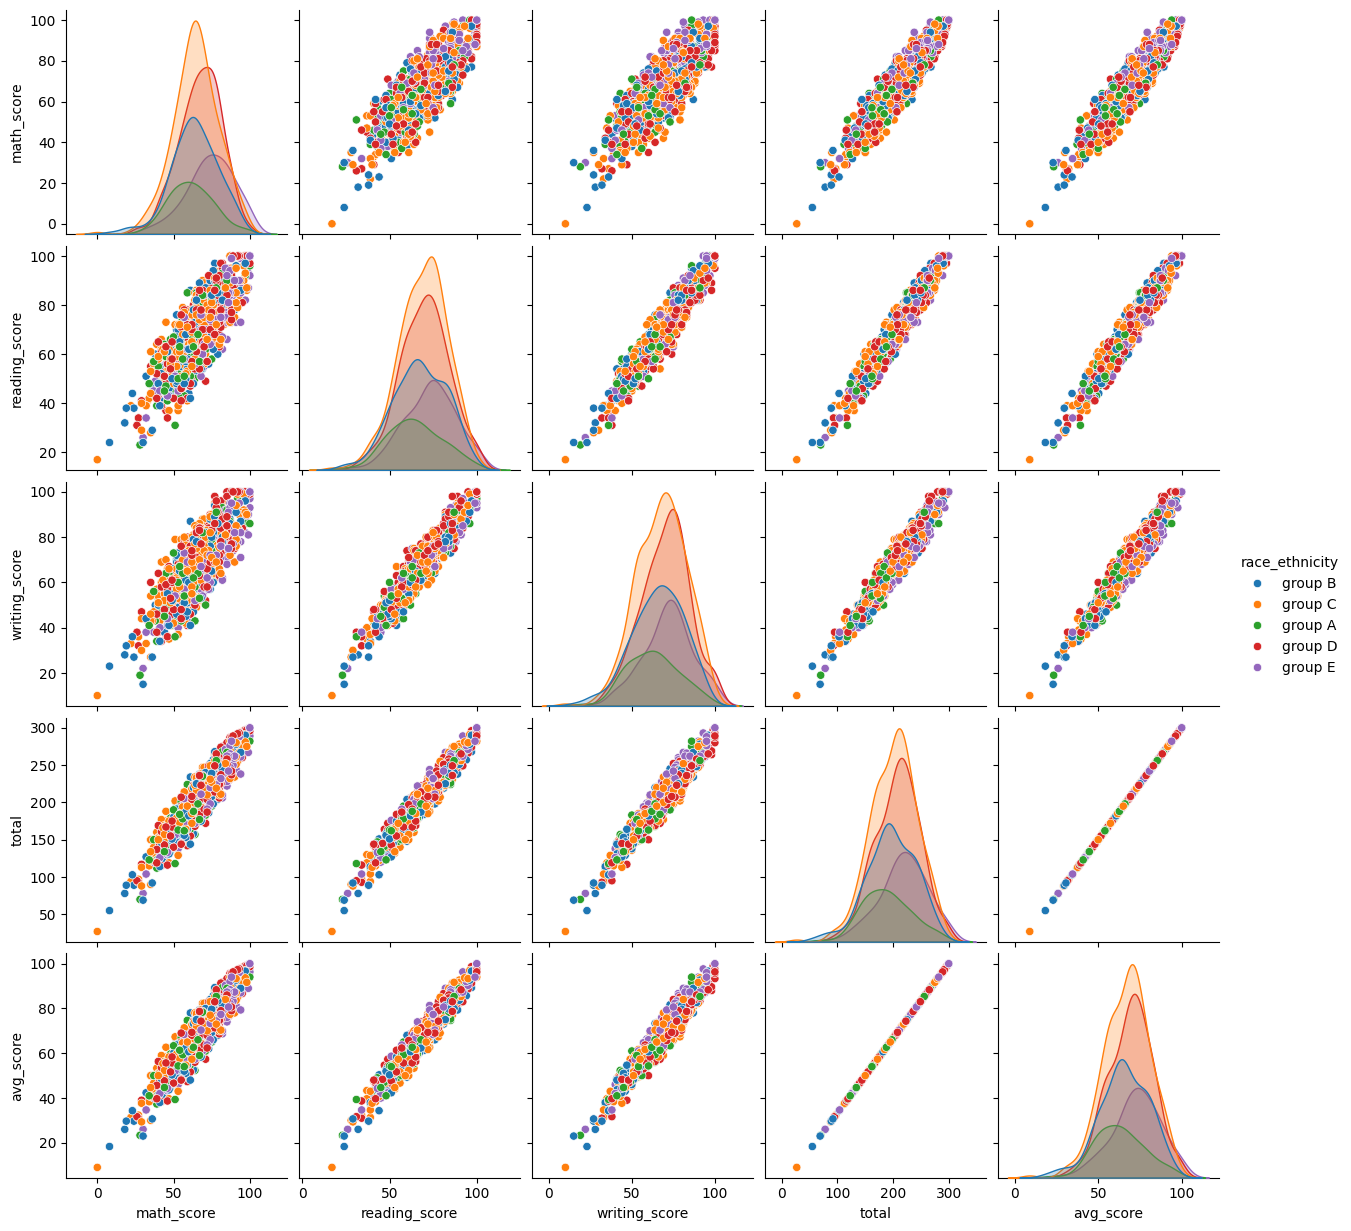

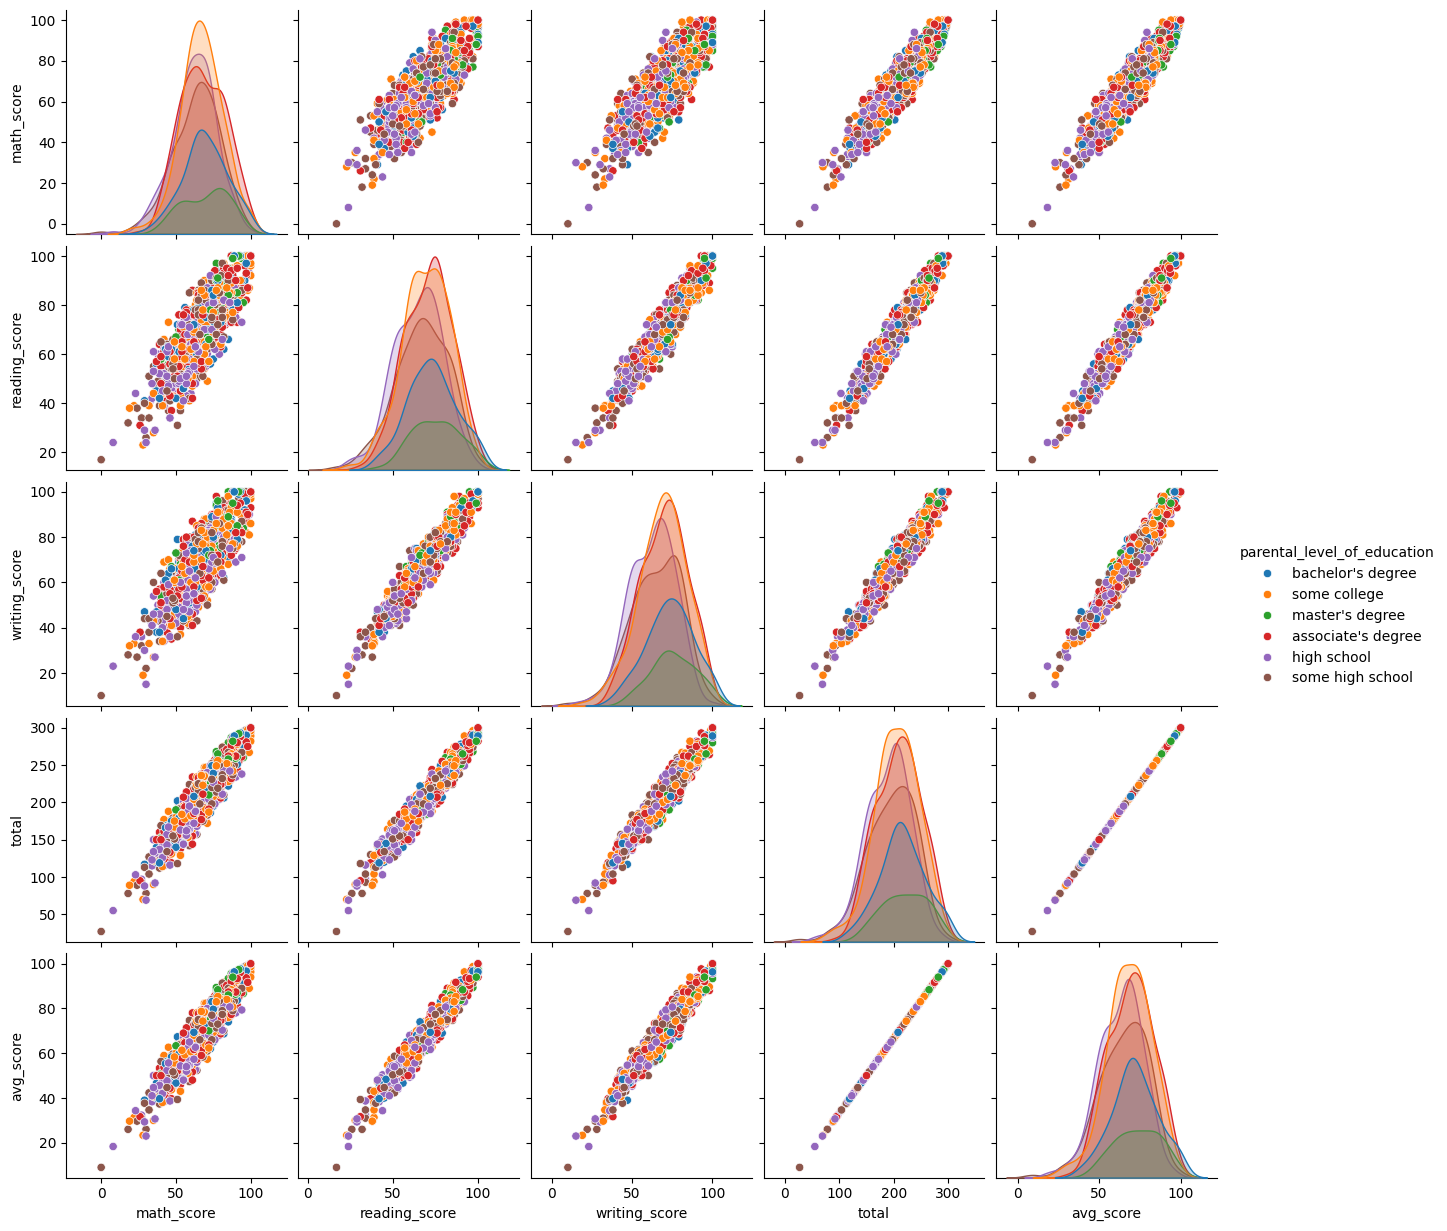

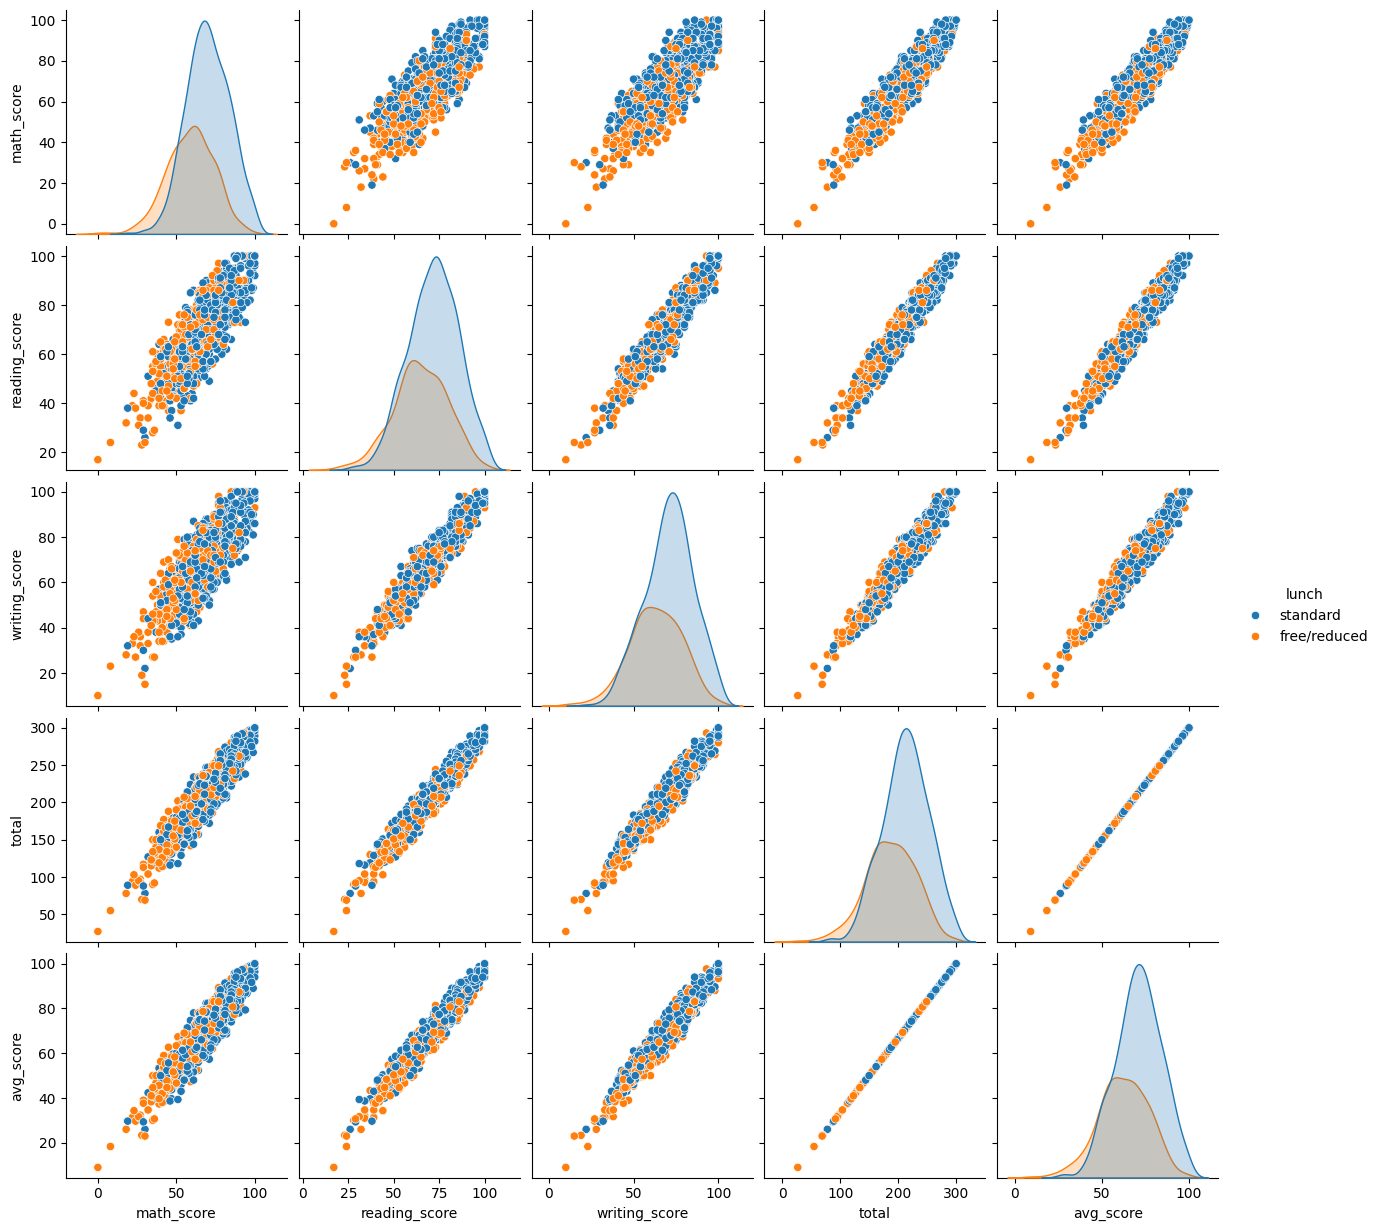

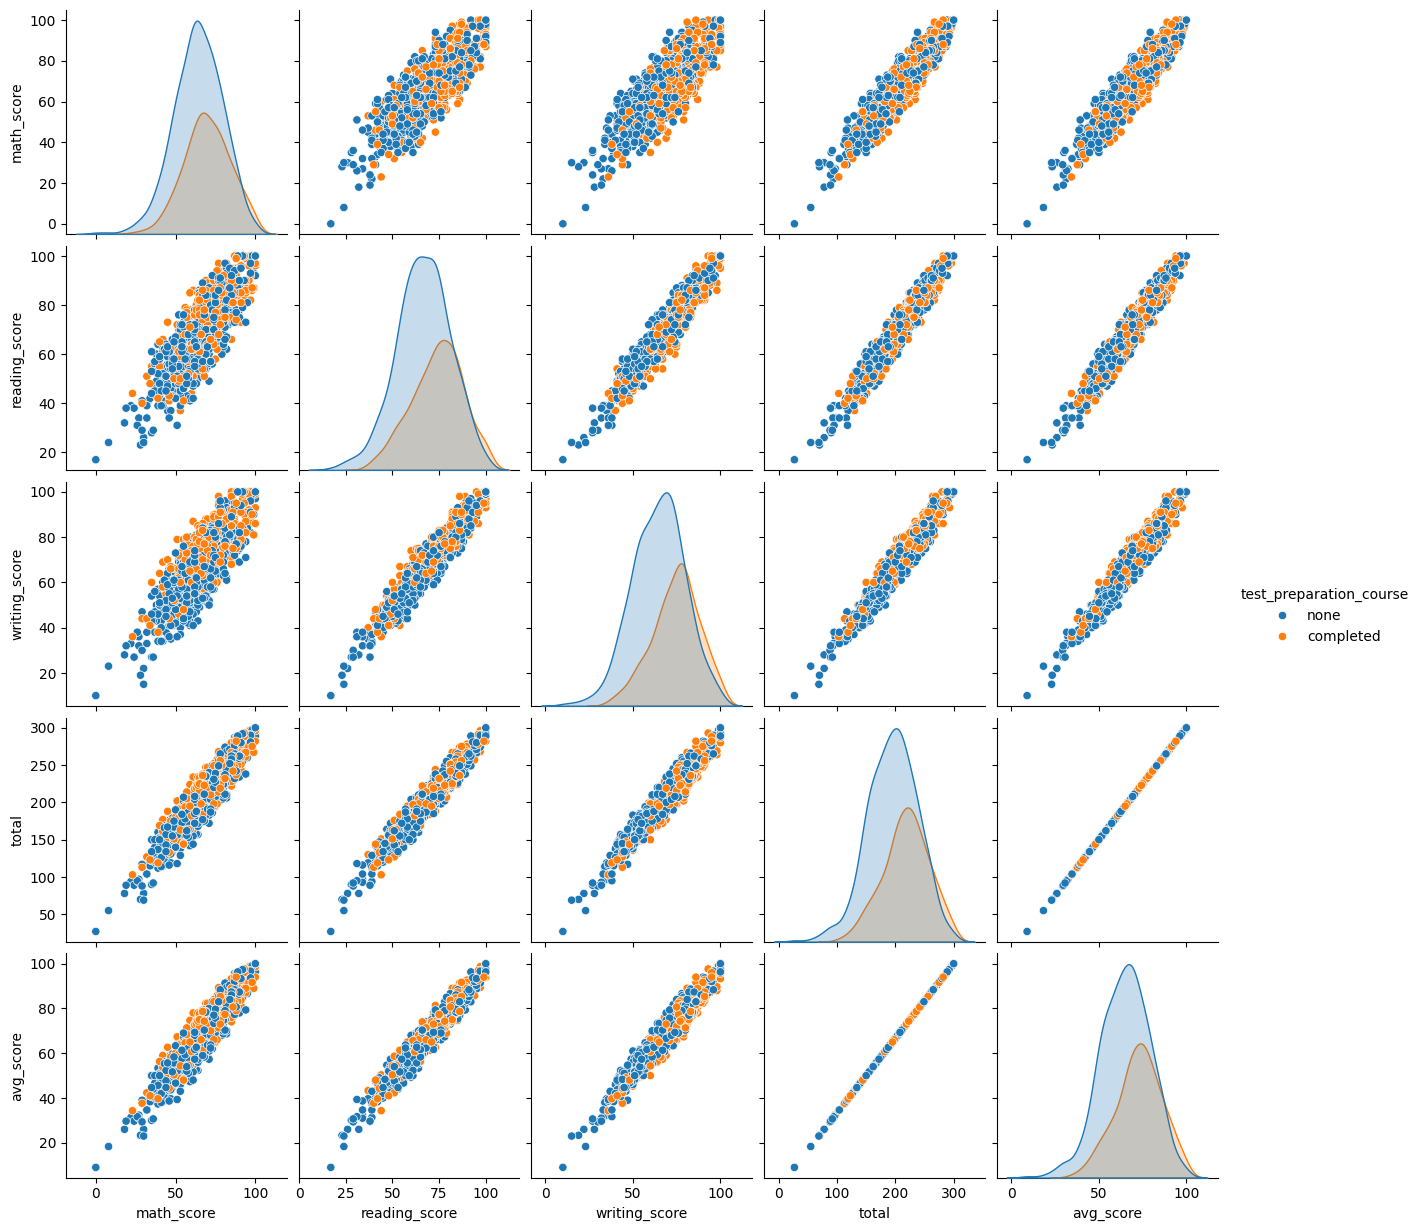

In [164]:
for col in cat_features:
    sns.pairplot(df,hue = col)
    
plt.show()

Observation 
- all the scores are linearly dependent
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.